In [6]:
#import necessary library
import pandas as pd
import numpy as np

In [83]:
num_rows=30
num_cols=6
col_names=['Open','High','Low','Close','Volume','Market Cap']
random_data=np.random.rand(num_rows,num_cols)
df=pd.DataFrame(random_data,columns=col_names)
df.head()

,Open,High,Low,Close,Volume,Market Cap
0,0.884032,0.131202,0.394541,0.180282,0.555189,0.812815
1,0.968719,0.584561,0.101064,0.558446,0.994427,0.762564
2,0.232132,0.368194,0.938445,0.084829,0.373505,0.840054
3,0.196925,0.128147,0.735087,0.456719,0.625743,0.671235
4,0.912494,0.419906,0.578702,0.825349,0.459409,0.809532


In [84]:
df['Date']=pd.to_datetime([10-11-2011,11/11/2011,12/11/2011,13/11/2011,14/11/2011,15/11,2011,16/11/2011,17/11/2011,18/11/2011,
19/11/2011,20/11,2011,21/11/2011,22/11/2011,23/11/2011,24/11/2011,25/11/2011,26/11/2011,
27/11/2011,28/11/2011,29/11/2011,30/11/2011,10/12/2011,11/12/2011,12/12/2011,13/12/2011,
14/12/2011,15/12/2011,16/12/2011])

In [86]:
df.head()

,Open,High,Low,Close,Volume,Market Cap,Date
0,0.884032,0.131202,0.394541,0.180282,0.555189,0.812815,1969-12-31 23:59:59.999997988
1,0.968719,0.584561,0.101064,0.558446,0.994427,0.762564,1970-01-01 00:00:00.000000000
2,0.232132,0.368194,0.938445,0.084829,0.373505,0.840054,1970-01-01 00:00:00.000000000
3,0.196925,0.128147,0.735087,0.456719,0.625743,0.671235,1970-01-01 00:00:00.000000000
4,0.912494,0.419906,0.578702,0.825349,0.459409,0.809532,1970-01-01 00:00:00.000000000


#EDA

In [87]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap,Date
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30
mean,0.532803,0.428207,0.554161,0.467964,0.482146,0.540358,1970-01-01 00:00:00.000000067
min,0.024624,0.010882,0.101064,0.001403,0.034066,0.040852,1969-12-31 23:59:59.999997988
25%,0.170228,0.286241,0.342553,0.175224,0.184762,0.329740,1970-01-01 00:00:00
50%,0.617163,0.416917,0.546704,0.440011,0.437000,0.611817,1970-01-01 00:00:00
75%,0.859788,0.624112,0.805882,0.762719,0.756368,0.760386,1970-01-01 00:00:00
max,0.968719,0.929838,0.988492,0.988525,0.994427,0.947755,1970-01-01 00:00:00.000002011
std,0.344254,0.253429,0.277491,0.314225,0.322577,0.268129,NaN


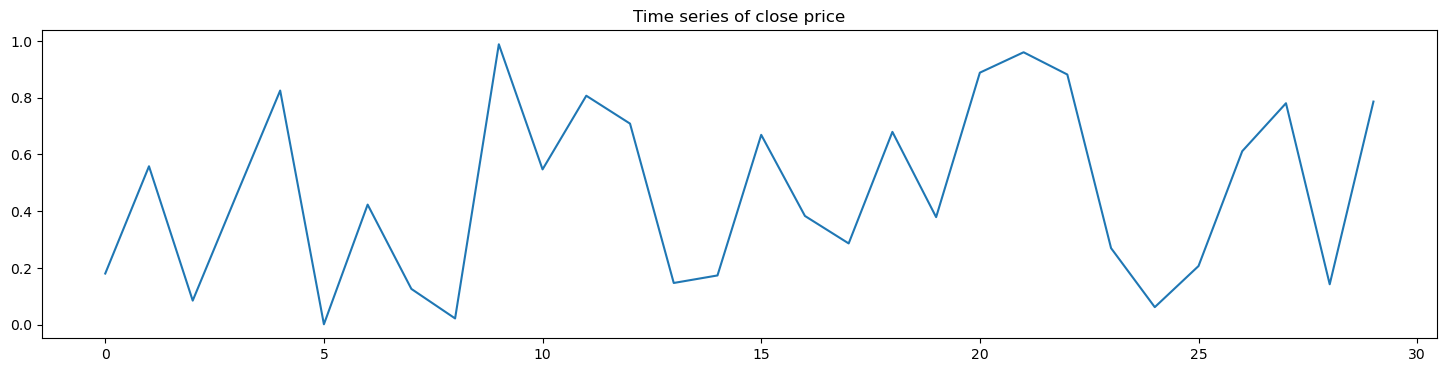

In [93]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,4))
plt.plot(df['Close'],label='Close_price')
plt.title('Time series of close price')
plt.show()

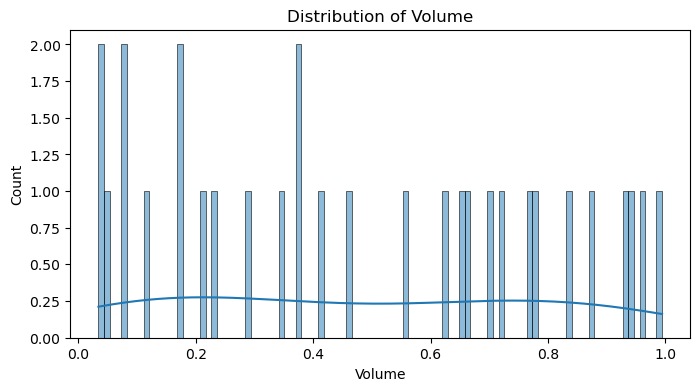

In [95]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.histplot(df['Volume'],bins=100,kde=True)
plt.title('Distribution of Volume')
plt.show()

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


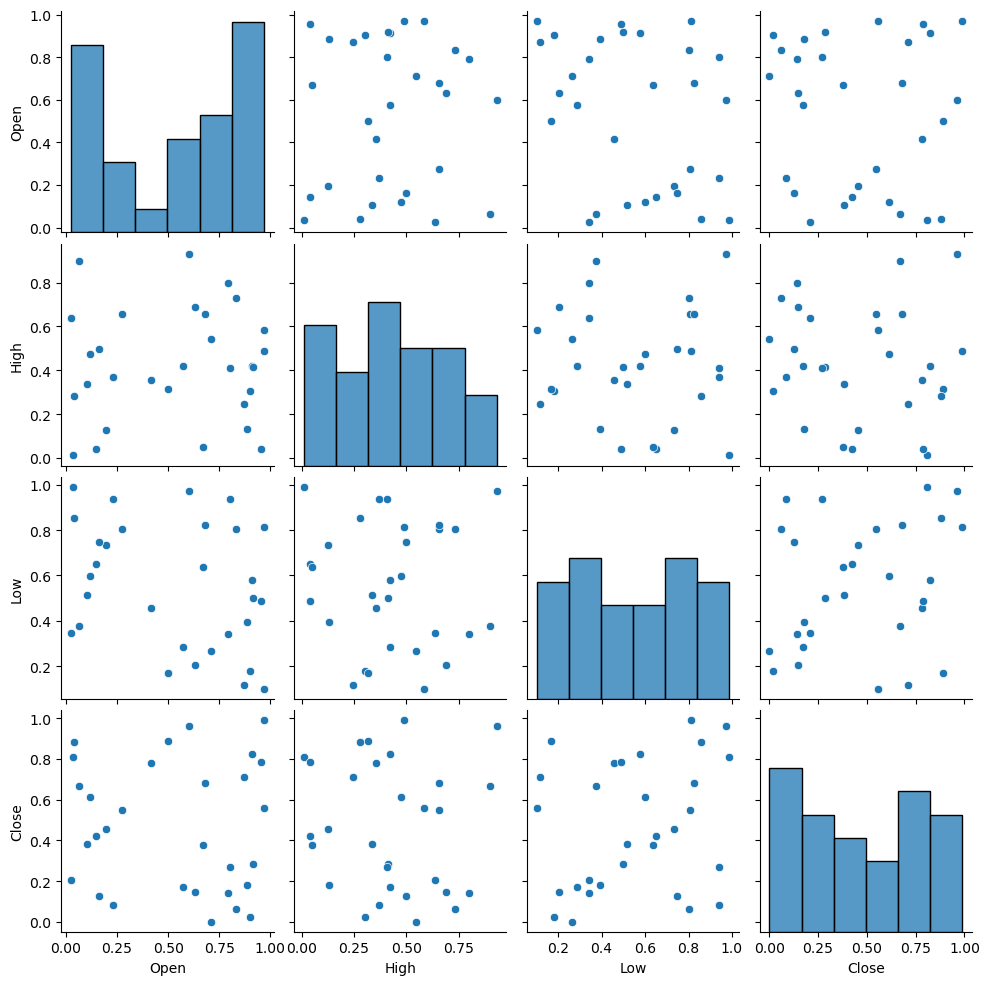

In [99]:
feat=['Open','High','Low','Close']
sns.pairplot(df[feat])

In [104]:
feat1=['Open','High','Low','Close','Volume']
correlation=df[feat1].corr()
correlation

,Open,High,Low,Close,Volume
Open,1.000000,0.048678,-0.311155,-0.069356,0.027609
High,0.048678,1.000000,-0.043877,-0.090346,0.001427
Low,-0.311155,-0.043877,1.000000,0.230252,-0.222776
Close,-0.069356,-0.090346,0.230252,1.000000,-0.099838
Volume,0.027609,0.001427,-0.222776,-0.099838,1.000000


#Perform filtering

In [115]:
#The `Close` price is greater than the `Open` price (indicating a positive gain).
df[df['Close']>df['Open']]

,Open,High,Low,Close,Volume,Market Cap,Date
3,0.196925,0.128147,0.735087,0.456719,0.625743,0.671235,1970-01-01 00:00:00.000000000
6,0.145731,0.038654,0.648378,0.423303,0.704236,0.260875,1970-01-01 00:00:00.000002011
9,0.968269,0.486019,0.811574,0.988525,0.414592,0.728563,1970-01-01 00:00:00.000000000
10,0.275900,0.656007,0.806533,0.547437,0.172772,0.827212,1970-01-01 00:00:00.000000000
11,0.035048,0.010882,0.988492,0.807146,0.214220,0.947755,1970-01-01 00:00:00.000000001
15,0.062224,0.898469,0.376507,0.669219,0.662241,0.733577,1970-01-01 00:00:00.000000000
16,0.105028,0.337273,0.514707,0.383266,0.076931,0.326426,1970-01-01 00:00:00.000000000
20,0.499140,0.314726,0.168302,0.888443,0.778693,0.339680,1970-01-01 00:00:00.000000000
21,0.600351,0.929838,0.974301,0.960365,0.052826,0.362093,1970-01-01 00:00:00.000000000
22,0.040879,0.280561,0.855412,0.881917,0.116017,0.753854,1970-01-01 00:00:00.000000000


In [119]:
# average volume
a=np.mean(df['Volume'])
a

0.4821463304820144

In [120]:
#The trading `Volume` was higher than the average trading volume for that period.
df[df['Volume']>a]

,Open,High,Low,Close,Volume,Market Cap,Date
0,0.884032,0.131202,0.394541,0.180282,0.555189,0.812815,1969-12-31 23:59:59.999997988
1,0.968719,0.584561,0.101064,0.558446,0.994427,0.762564,1970-01-01 00:00:00.000000000
3,0.196925,0.128147,0.735087,0.456719,0.625743,0.671235,1970-01-01 00:00:00.000000000
5,0.710168,0.544289,0.264559,0.001403,0.962900,0.794653,1970-01-01 00:00:00.000000001
6,0.145731,0.038654,0.648378,0.423303,0.704236,0.260875,1970-01-01 00:00:00.000002011
7,0.161329,0.496314,0.746363,0.126099,0.944582,0.736587,1970-01-01 00:00:00.000000000
12,0.869096,0.247406,0.115662,0.708804,0.877832,0.140536,1970-01-01 00:00:00.000002011
14,0.574553,0.420617,0.285288,0.173538,0.718865,0.398196,1970-01-01 00:00:00.000000000
15,0.062224,0.898469,0.376507,0.669219,0.662241,0.733577,1970-01-01 00:00:00.000000000
18,0.680412,0.656149,0.824399,0.679697,0.934077,0.040852,1970-01-01 00:00:00.000000000


#for loop and condition statement

In [126]:
#Use a for loop to iterate over the rows of the DataFrame and calculate the daily price change (difference between `Close` and `Open`), adding this as a new column `Price Change`.
Price_change=df['Close']-df['Open']
#initialize an empty list
price_change=[]
for index,row in df.iterrows():
    Price_change=row['Close']-row['Open']
    price_change.append(Price_change)
df['Price_change']=price_change
df.head()

,Open,High,Low,Close,Volume,Market Cap,Date,Price_change
0,0.884032,0.131202,0.394541,0.180282,0.555189,0.812815,1969-12-31 23:59:59.999997988,-0.703750
1,0.968719,0.584561,0.101064,0.558446,0.994427,0.762564,1970-01-01 00:00:00.000000000,-0.410273
2,0.232132,0.368194,0.938445,0.084829,0.373505,0.840054,1970-01-01 00:00:00.000000000,-0.147302
3,0.196925,0.128147,0.735087,0.456719,0.625743,0.671235,1970-01-01 00:00:00.000000000,0.259793
4,0.912494,0.419906,0.578702,0.825349,0.459409,0.809532,1970-01-01 00:00:00.000000000,-0.087145


In [ ]:
#Apply an if-else condition to create another column `Price Trend`, where:
#If the `Close` price is higher than the `Open` price, set the value to "Up."
#Otherwise, set the value to "Down."
price=[]
for index,row in df.iterrows():
    if row['Close']>row['Open']:
        price.append("Up")
    else:
        price.append('Down')
df['Price trend']=price
df.head()